# **YouTube Video Summarizer, powered by the dynamic duo of LangChain and OpenAI**


#**Step 01: Install All the Required Packages**

In [1]:
!pip install langchain-openai -q
!pip install langchain -q
!pip install openai -q
# !pip install PyPDF2 -q
# !pip install faiss-cpu -q
!pip install tiktoken -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.6/229.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 6.0 MB/s eta 0:00:00
  

In [2]:
!pip install youtube-transcript-api -q
!pip install pytube -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.5 MB/s eta 0:00:00


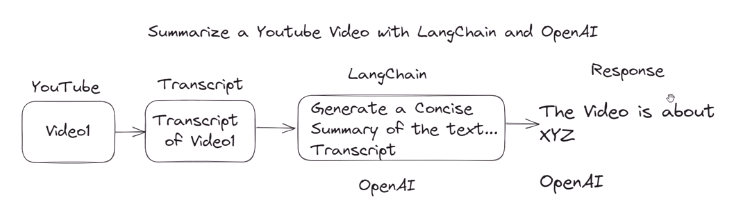

#**Step 02: Import All the Required Libraries**

In [19]:
import os
from langchain.document_loaders import YoutubeLoader

from langchain_community.callbacks import get_openai_callback

In [5]:
# from langchain.llms import OpenAI
from langchain.chains import LLMChain, SequentialChain
from langchain.chains.summarize import load_summarize_chain
from langchain.prompts import PromptTemplate
from langchain_openai import OpenAI

#**Step 03: Setup the Environment**

In [ ]:
from langchain.chains.summarize import load_summarize_chain
from langchain_community.document_loaders import WebBaseLoader
from langchain_openai import ChatOpenAI

loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
docs = loader.load()

llm = ChatOpenAI(temperature=0, model_name="gpt-3.5-turbo-1106")
chain = load_summarize_chain(llm, chain_type="stuff")

chain.run(docs)

In [6]:
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

#**Step 04: Load the Youtube Video and Generate a Transcript of it**

In [8]:
loader = YoutubeLoader.from_youtube_url("https://www.youtube.com/watch?v=Xx9qXZ0hHC8", add_video_info=True)

In [9]:
result = loader.load()

In [10]:
result

[Document(page_content="hello everyone I have an exciting news new object detection model yoloas is just released today Desi Ai and AI optimization company have launched a new object detection model known as YOLO Nas so let's see what is Viola Nas and key features of yellow Nas you don't knows modern has been developed using the neural architecture search technology which allows the creation of efficient and high performing deep learning models so there are architecture surge is an automated process that searches for the optimal neural network architecture for a particular toss it does this by exploring a vast search base of possible architectures and selecting the most efficient and high performing one so let's explore the key features of your load Nas so yolonas enhanced the detection of small objects and improves the accuracy and gives better performance by compute ratio in front of you you can see the comparison of YOLO V5 Euro V8 Euro V7 Euro Nas has been presented for small objec

In [11]:
print(type(result))

<class 'list'>


In [15]:
# 5min 12 sec
5*60+12

312

In [12]:
print(f"Found Video from {result[0].metadata['author']} that is {result[0].metadata['length']} seconds long")

Found Video from Muhammad Moin that is 312 seconds long


In [ ]:
print(result)

[Document(page_content="hello everyone I have an exciting news new object detection model yoloas is just released today Desi Ai and AI optimization company have launched a new object detection model known as YOLO Nas so let's see what is Viola Nas and key features of yellow Nas you don't knows modern has been developed using the neural architecture search technology which allows the creation of efficient and high performing deep learning models so there are architecture surge is an automated process that searches for the optimal neural network architecture for a particular toss it does this by exploring a vast search base of possible architectures and selecting the most efficient and high performing one so let's explore the key features of your load Nas so yolonas enhanced the detection of small objects and improves the accuracy and gives better performance by compute ratio in front of you you can see the comparison of YOLO V5 Euro V8 Euro V7 Euro Nas has been presented for small objec

In [16]:
llm=OpenAI(temperature=0.6, api_key=OPENAI_API_KEY)

#**Step 05: YouTube Video Summary**

### chain_type = 'stuff'

use load_summarize_chain with chain_type="stuff"

This chain takes a list of documents and formats them all into a prompt, then passes that prompt to an LLM. It passes ALL documents, so you should make sure it fits within the context window the LLM you are using.

In [17]:
chain = load_summarize_chain(llm=llm, chain_type = 'stuff', verbose=True)

In [18]:
chain.run(result)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"hello everyone I have an exciting news new object detection model yoloas is just released today Desi Ai and AI optimization company have launched a new object detection model known as YOLO Nas so let's see what is Viola Nas and key features of yellow Nas you don't knows modern has been developed using the neural architecture search technology which allows the creation of efficient and high performing deep learning models so there are architecture surge is an automated process that searches for the optimal neural network architecture for a particular toss it does this by exploring a vast search base of possible architectures and selecting the most efficient and high performing one so let's explore the key features of your load Nas so yolonas enhanced the detection of small objects and improves the accuracy and gives better performance by 

'\n\nDesi AI, an AI optimization company, has launched a new object detection model called YOLO Nas, which uses neural architecture search technology to create efficient and high performing deep learning models. YOLO Nas outperforms previous YOLO models in terms of accuracy and speed, and has been pre-trained on top datasets. It also features quantization friendly blocks for optimized performance and post-training quantization for increased efficiency. A comparison of YOLO Nas with other YOLO models shows that it is the most accurate and fastest, making it the top-performing model.'

In [20]:


with get_openai_callback() as cb:
    response = chain.invoke(result)
    print(cb)



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"hello everyone I have an exciting news new object detection model yoloas is just released today Desi Ai and AI optimization company have launched a new object detection model known as YOLO Nas so let's see what is Viola Nas and key features of yellow Nas you don't knows modern has been developed using the neural architecture search technology which allows the creation of efficient and high performing deep learning models so there are architecture surge is an automated process that searches for the optimal neural network architecture for a particular toss it does this by exploring a vast search base of possible architectures and selecting the most efficient and high performing one so let's explore the key features of your load Nas so yolonas enhanced the detection of small objects and improves the accuracy and gives better performance by 

In [21]:
cb

Tokens Used: 1016
	Prompt Tokens: 860
	Completion Tokens: 156
Successful Requests: 1
Total Cost (USD): $0.001602

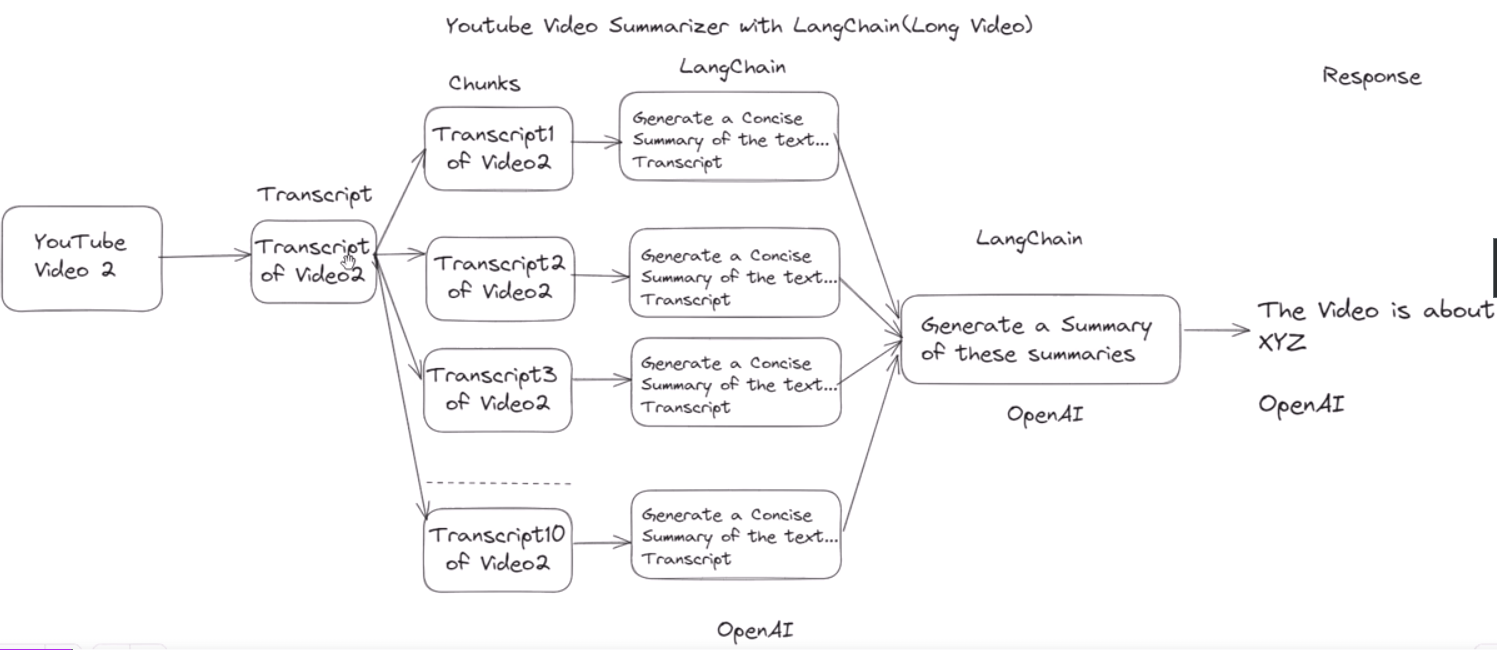

#**Step 06: Load a Very Long Youtube Video and Generate a Transcript for it**

In [ ]:
loader = YoutubeLoader.from_youtube_url("https://www.youtube.com/watch?v=aJHBDCFAZ-g", add_video_info=True)

In [ ]:
result=loader.load()

In [ ]:
print(type(result))

<class 'list'>


In [ ]:
print(f"Found Video from {result[0].metadata['author']} that is {result[0].metadata['length']} seconds long")

Found Video from Muhammad Moin that is 2367 seconds long


In [ ]:
print(result)

[Document(page_content="hello everyone in this video tutorial we will see how we can do license plate detection and recognition using YOLO Nas so here is the complete notebook script I will be guiding you step by step on how you can do license plate detection and recognition using yolanas for license plate detection I will be using your own asmo object detection order and to read the text from the lessons plate I will be using easy OCR so to detect a license plate I will use YOLO Nas model and to read the text on the lessons plate I will be using easy OCR so let's get started so here you can see that we have the license plate data set over here the data set consists of 300 images and here we have the air ratio like we have 601 images in the training set 64 images in the validation set and 30 images in the test set and the splitting ratio is eighty percent six percent of the images are in a training set nine percent of the images are in the validation set and four percent of the images 

#**Step 07: YouTube Video Summary**

In [ ]:
llm=OpenAI(temperature=0.6)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

In [ ]:
texts = text_splitter.split_documents(result)

In [ ]:
len(texts)

36

In [ ]:
texts[0]

Document(page_content="hello everyone in this video tutorial we will see how we can do license plate detection and recognition using YOLO Nas so here is the complete notebook script I will be guiding you step by step on how you can do license plate detection and recognition using yolanas for license plate detection I will be using your own asmo object detection order and to read the text from the lessons plate I will be using easy OCR so to detect a license plate I will use YOLO Nas model and to read the text on the lessons plate I will be using easy OCR so let's get started so here you can see that we have the license plate data set over here the data set consists of 300 images and here we have the air ratio like we have 601 images in the training set 64 images in the validation set and 30 images in the test set and the splitting ratio is eighty percent six percent of the images are in a training set nine percent of the images are in the validation set and four percent of the images a

In [ ]:
texts[1]

Document(page_content="and the splitting ratio is eighty percent six percent of the images are in a training set nine percent of the images are in the validation set and four percent of the images are in that testing set and if you just see over here we have only one class in this data set which is of lessons and here you can see the images so you can see that we have only one class in our data set which is of lessons we don't have multi-classes and here you can see that a bounding box uh is being created around the lessons plate in the images like you can see over here uh bounding boxes are created around the lessons plate in the images like you can see over here you can see over here as well and you can see over here as well like I like bounding boxes have been created around the license plates if I go to the next image you can see that we have the bounding box around the lessons plate so I will be training or fine tuning my YOLO YOLO Nas model on this license plate data set so after

In [ ]:
chain = load_summarize_chain(llm=llm, chain_type = 'map_reduce', verbose=False)

In [ ]:
chain.run(texts)

' This text outlines the process of training a YOLO Nas model on a license plate data set in order to detect the license plate in images and videos. After detecting the license plate, Easy OCR is used to read the text on it. The code is provided and the reader should make sure to select the GPU before running the script. The results are seen to be "fine" and the model works "very profine." The output video is saved by the name detections.mp4 and the author has done the detection. The Mean Average Precision (MAP) was 90.88 and the F1 score with IOU 0.5 was 0.1017. The system was then tested on a sample image to determine if the license plate could be detected, which it was, confirming the success of the system.'

In [ ]:
chain = load_summarize_chain(llm=llm, chain_type = 'map_reduce', verbose=True)

In [ ]:
chain.run(texts[:4])



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"hello everyone in this video tutorial we will see how we can do license plate detection and recognition using YOLO Nas so here is the complete notebook script I will be guiding you step by step on how you can do license plate detection and recognition using yolanas for license plate detection I will be using your own asmo object detection order and to read the text from the lessons plate I will be using easy OCR so to detect a license plate I will use YOLO Nas model and to read the text on the lessons plate I will be using easy OCR so let's get started so here you can see that we have the license plate data set over here the data set consists of 300 images and here we have the air ratio like we have 601 images in the training set 64 images in the validation set and 30 images in the test set and the splitting ratio is eighty percent s

' This article explains how to use YOLO Nas to detect license plates and Easy OCR to read the text from the license plates in a dataset with a splitting ratio of 80/6/4 for training, validation, and testing sets respectively. It also explains how to install and set up a GPU for OCR reading.'

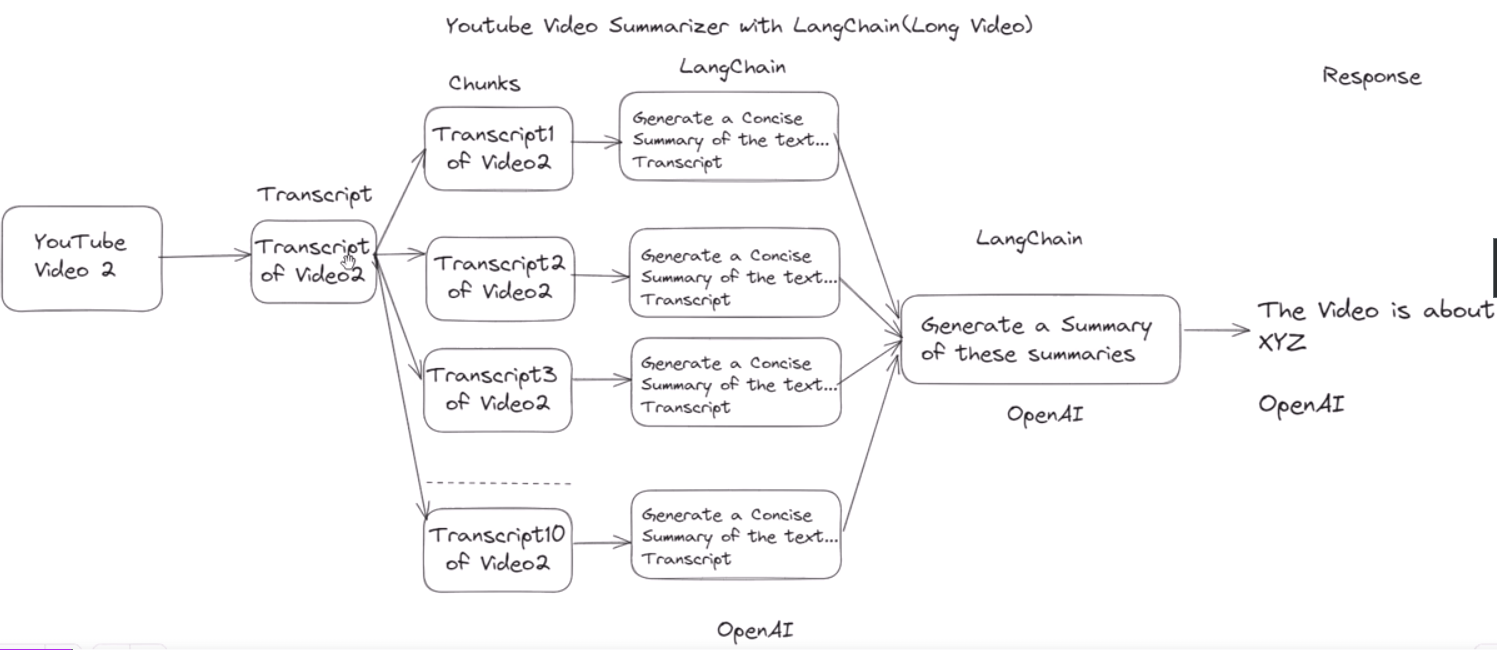

#**Step 08: Multiple YouTube Videos | Generate a Summary**

In [ ]:
youtube_url_list = ["https://www.youtube.com/watch?v=Ijk6R5EHP7s", "https://www.youtube.com/watch?v=aJHBDCFAZ-g"]

In [ ]:
text = []

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap = 200)


for url in youtube_url_list:
  loader = YoutubeLoader.from_youtube_url(url, add_video_info=True)
  result=loader.load()
  text.extend(text_splitter.split_documents(result))

In [ ]:
len(text)

62

In [ ]:
llm = OpenAI(temperature=0.6)

In [ ]:
chain = load_summarize_chain(llm=llm, chain_type = 'map_reduce', verbose=False)

In [ ]:
chain.run(texts)

' This video tutorial explains how to detect and read the text on license plates using a YOLO Nas model and Easy OCR. The model is trained on a license plate dataset, and then tested on images and videos. The results are outputted as a video, and the script is run to check for errors. The color of the bounding box is changed, and the text is displayed. The model is also tested on car crashes and found to be successful.'